In [1]:
# Open metadata file
path = '../cars/annotations/tripod-seq.txt'

with open(path, 'r') as f:
    lines = f.readlines()
    lines = [' '.join(line.split()).split(' ') for line in lines]

In [2]:
n_seq, width, height = [int(x) for x in lines[0]]


In [3]:
# Create named tuple
from collections import namedtuple
CarSequence = namedtuple('CarSequence', ['seq_id', 'frames', 'frames360', 'frame_frontal','rotation'])

In [6]:
car_sequences = []
for i in range(0,n_seq):
    car_sequences.append(
        CarSequence(
            seq_id=i+1, 
            frames=int(lines[1][i]), 
            frames360=int(lines[4][i]), 
            frame_frontal=int(lines[5][i]), 
            rotation=int(lines[6][i]))
    )

In [7]:
car_sequences[0]

CarSequence(seq_id=1, frames=118, frames360=109, frame_frontal=50, rotation=1)

In [8]:
# Pair images with random rotation
import random
random.seed(0)

def get_random_rotation(seq_id, frame):
    seq_id_index = seq_id-1
    random_rotation_degrees = random.randint(0, 4) * 10 # TODO try larger rotations?
    total_frames = car_sequences[seq_id_index].frames
    frames_360 = car_sequences[seq_id_index].frames360
    direction = car_sequences[seq_id_index].rotation

    frames_per_degree = frames_360 / 360
    frame_rotated = frame + int(random_rotation_degrees * frames_per_degree) % total_frames

    if direction == -1:
        random_rotation_degrees = -random_rotation_degrees

    return frame_rotated, random_rotation_degrees



In [9]:
get_random_rotation(0, 0)

(6, 30)

In [17]:
# view images
import matplotlib.pyplot as plt

def view_image(seq_id, frame):
    path = '../cars/epfl-gims08/tripod-seq/tripod_seq_{:02d}_{:03d}.jpg'
    img = plt.imread(path.format(seq_id, frame))
    # rotated image
    frame_rotated, degrees = get_random_rotation(seq_id, frame)
    path_rotated = path.format(seq_id, frame_rotated)
    img_rotated = plt.imread(path_rotated)

    plt.subplot(1, 2, 1)
    img = plt.imshow(img)
    plt.title(f'Frame: {frame}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    img_rotated = plt.imshow(img_rotated)
    plt.axis('off')

    plt.title(f'Frame: {frame_rotated} Rotation: {degrees}')
    plt.show()

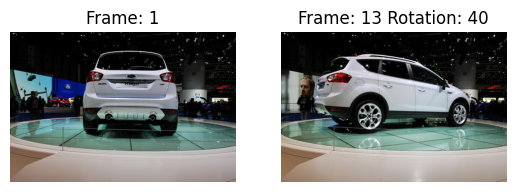

In [18]:
view_image(1, 1)

In [4]:
from os import listdir

In [6]:
len(listdir('../cars/epfl-gims08/tripod-seq/'))

2299

In [3]:
f = listdir('cars/epfl-gims08/tripod-seq/')[0]

In [15]:
cur_seq = int(f.split('_')[2])
cur_frame = int(f.split('_')[3].split('.')[0])